# 날씨 데이터세트

이 튜토리얼은 막스 플랑크 생물 지구화학 연구소에서 기록한 날씨 시계열 데이터세트를 사용합니다.

이 데이터세트에는 온도, 대기압 및 습도와 같은 14가지 특성이 있습니다. 이러한 데이터는 2003년부터 시작해 10분 간격으로 수집되었습니다. 효율성을 위해 2009년과 2016년 사이에 수집된 데이터만 사용하겠습니다. 이 데이터세트 부분은 François Chollet이 자신이 저술한 책 Deep Learning with Python을 위해 준비 되었다고 합니다.

reference: https://www.tensorflow.org/tutorials/structured_data/time_series?hl=ko

In [95]:
# load DataSet

import pandas as pd
dataset_path = "./datasets/jena_climate_2009_2016.csv"
df = pd.read_csv(dataset_path)
# 시간별 예측만 사용하기 위해서 서브샘플링
df = df[5::6]
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [96]:
date_time

5        2009-01-01 01:00:00
11       2009-01-01 02:00:00
17       2009-01-01 03:00:00
23       2009-01-01 04:00:00
29       2009-01-01 05:00:00
                 ...        
420521   2016-12-31 19:10:00
420527   2016-12-31 20:10:00
420533   2016-12-31 21:10:00
420539   2016-12-31 22:10:00
420545   2016-12-31 23:10:00
Name: Date Time, Length: 70091, dtype: datetime64[ns]

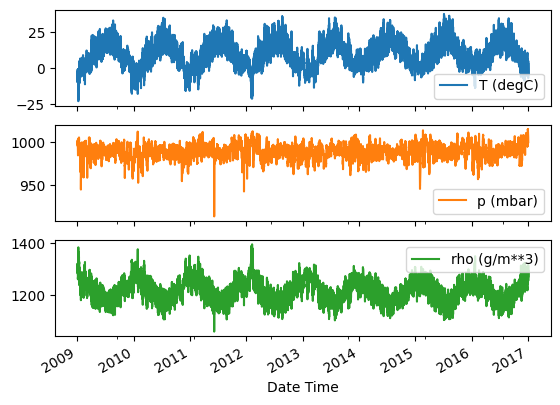

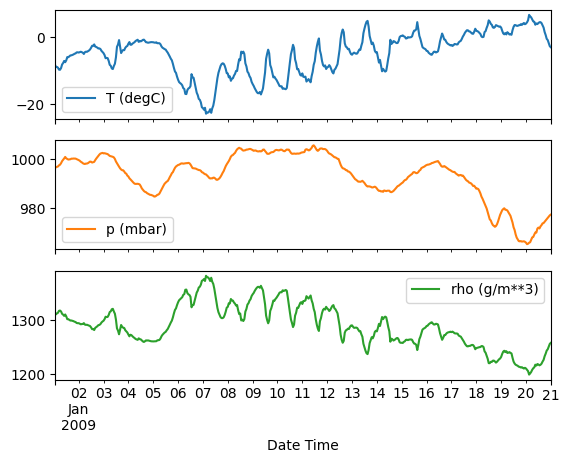

In [97]:
# 시간이 지남에 따라 특성의 전개 양상을 확인

plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)


In [98]:
# 데이터세트 통계 확인

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


In [99]:
#풍속(wv (m/s))의 min 값과 최댓값(max. wv (m/s)) 열입니다. -9999는 오류일 수 있습니다.
# 별도의 풍향 열이 있으므로 속도는 0보다 커야 합니다({code 0}>=0{/code 0}). 0으로 교체합니다.

wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0
df['wv (m/s)'].min()

0.0

### 특성 엔지니어링

모델을 구축하기 전에 데이터를 이해하고 모델에 적절한 형식의 데이터를 전달하고 있는지 확인하는 것이 중요하다.

#### 바람

데이터의 마지막 wd (deg) - 바람의 방향을 도 단위로 제공, 각도는 좋은 모델 입력을 만들지 않는다. 바람의 방향은 순환적이며, 0도와 360도는 실제로 가까운 값임에도 불구하고 멀리 떨어져 있다. 바람이 0도와 360도 사이에서 10도로 회전하면 모델이 이를 이해하지 못할 수 있다. 이 문제를 해결하는 한 가지 방법은 바람의 방향을 2D 벡터로 변환하는 것이다. 이 방법은 바람이 0도에서 360도까지 회전할 때 2D 공간에서 원을 그리는 것과 같다. 이 방법은 바람의 방향을 2D 공간의 좌표로 변환하므로 모델이 이해하기 쉽다.

In [100]:
import numpy as np
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

풍향과 속도 열을 바람 벡터로 변환하면 모델이 해석하기가 더 쉬워진다.

(-11.305513973134667, 8.24469928549079, -8.27438540335515, 7.7338312955467785)

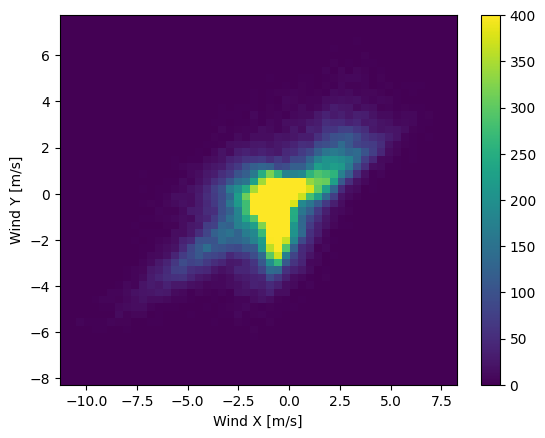

In [101]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [102]:
# Date Time 열은 유용하지만 초로 변환
timestamp_s = date_time.map(pd.Timestamp.timestamp)

풍향과 유사하게 초 단위의 시간은 유용한 모델 입력이 아닙니다. 날씨 데이터이기 때문에 일별 및 연간 주기가 명확합니다. 주기성을 다룰 수 있는 방법은 여러 가지가 있습니다.

사인 및 코사인 변환을 사용하여 "시간" 및 "시간" 신호를 지우면 사용 가능한 신호를 얻을 수 있습니다.

In [103]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

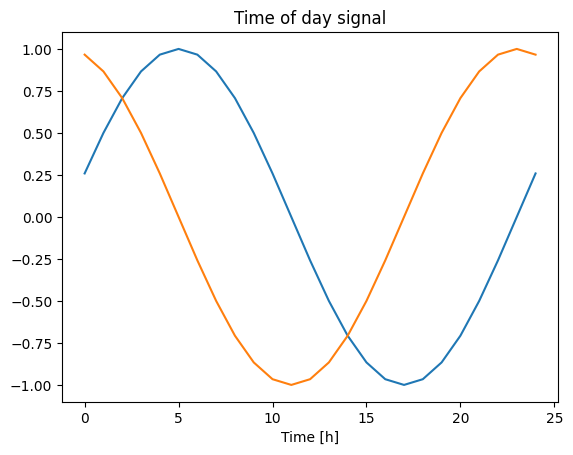

In [104]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

모델이 가장 중요한 빈도 특성에 액서스할 수 있다. 이 경우 어떤 빈도가 중요한지 미리 알고 있다.



Text(0.5, 0, 'Frequency (log scale)')

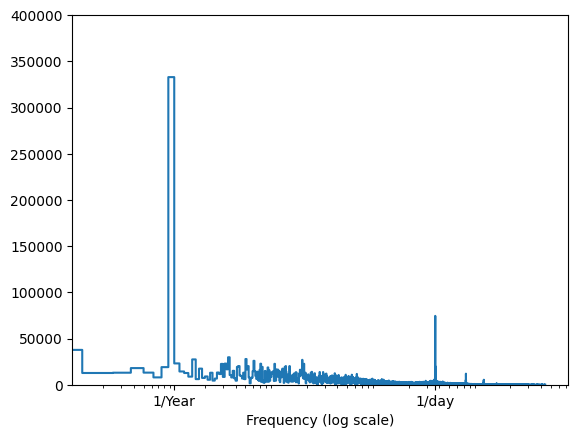

In [105]:
import torch

fft = torch.fft.rfft(torch.tensor(df['T (degC)'].values))
f_per_dataset = np.arange(0, len(fft))
n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset

plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
plt.xlabel('Frequency (log scale)')

### 데이터 분할

훈련, 검증 및 테스트에 70%, 20%, 10%의 데이터를 사용한다. 데이터는 셔플하지 않는다.

In [106]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [108]:
(train_df.shape, val_df.shape, test_df.shape)

((49063, 19), (14018, 19), (7010, 19))

### 데이터 정규화

신경망을 훈련하기 전에 특성의 크기를 정한다. 정규화는 각 특성의 평균을 빼고 표준 편차로 나누어 특성의 단위 분산을 갖도록 한다.

모델이 검증 및 테스트 세트의 값에 액세스할 수 없도록 훈련 데이터를 사용해서만 평균 및 표준 편차를 계산한다.

모델이 훈련할 때 훈련 세트의 미래 값에 엑서스할 수 없어야 하고 이 정규화가 이동 평균을 사용하여 수행되어야 한다.


In [109]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

특성 분포를 확인한다.

/tmp/ipykernel_31212/76176940.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


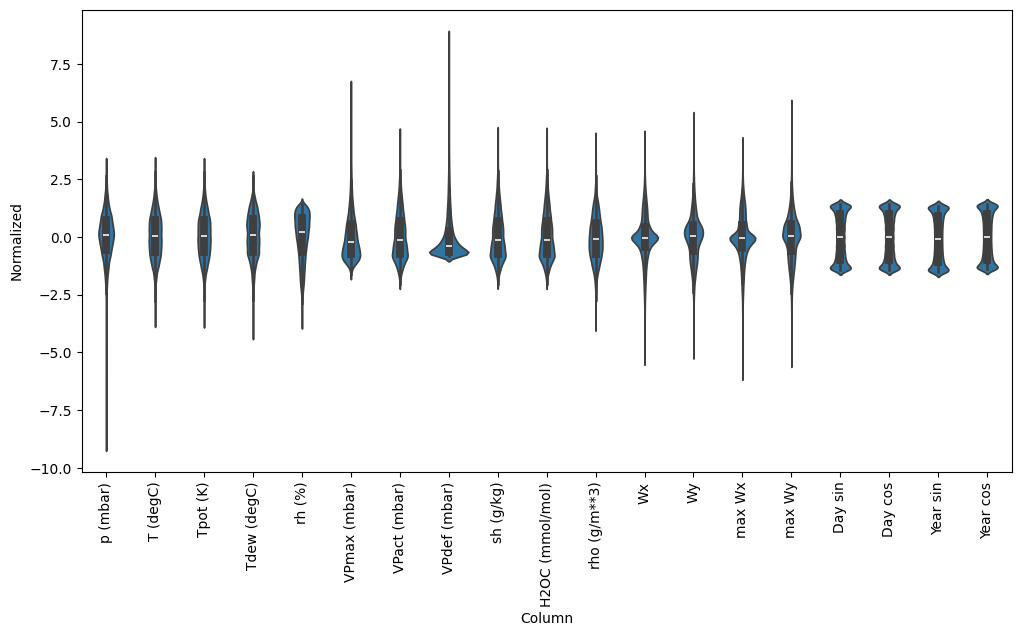

In [79]:
import seaborn as sns
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

### 데이터 창 작업

이 튜토리얼의 모델은 데이터의 연속된 샘플 창을 기반으로 일련의 예측을 수행한다.

입력 창의 주요 특성은 다음과 같다.

* 입력 및 레이블 창의 너비(타임스텝 수)
* 각 사아의 시간 오프셋
* 입력, 레이블 또는 둘 모두로 사용되는 특성

이 튜토리얼은 다양한 모델(선형, DNN, CNN, 및 RNN)을 빌드하고 다음 두 가지 목적으로 이 모델을 사용합니다.

* 단일 출력 및 다중 출력 예측
* 단일 타임스텝 및 다중 타임스텝 예측

In [80]:
class WindowGenerator():
    def __init__(self,
                input_width, # 입력 너비
                label_width, # 레이블 너비
                shift, # 이동
                train_df, # 학습 데이터 프레임
                val_df, # 검증 데이터 프레임
                test_df, # 테스트 데이터 프레임
                label_columns=None): # 레이블 열
        # Store the raw data.

        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns

        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        
        self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}
        
        # Work out the input column indices.
        self.input_width = input_width
        self.label_width = label_width 
        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width) # 입력 슬라이스
        self.input_indices = np.arange(self.total_window_size)[self.input_slice] # 입력 인덱스

        self.label_start = self.total_window_size - self.label_width # 레이블 시작
        self.labels_slice = slice(self.label_start, None) # 레이블 슬라이스
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice] # 레이블 인덱스

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])
    
w1 = WindowGenerator(input_width=24, label_width=1, shift=24, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=['T (degC)'])
w2 = WindowGenerator(input_width=6, label_width=1, shift=1, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=['T (degC)'])

print("--------- w1 ---------")
print(w1)
print("--------- w2 ---------")
print(w2)

--------- w1 ---------
Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['T (degC)']
--------- w2 ---------
Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']


### 2 분할

연속적인 입력 목록이 주어지면 `split_window` 메서드는 이 목록을 입력 창과 레이블 창으로 변환한다.

`split_window` 함수는 단일 출력과 다중 출력 예에서 모두 사용될 수 있도록 label_columns를 처리한다.

In [81]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = torch.stack([labels[:, :, self.column_indices[name]] for name in self.label_columns], axis=-1)

    return inputs, labels

WindowGenerator.split_window = split_window

In [82]:
# Stack three slices, the length of the total window.
example_window = torch.stack([torch.tensor(train_df[:w2.total_window_size].values),
                              torch.tensor(train_df[100:100+w2.total_window_size].values),
                              torch.tensor(train_df[200:200+w2.total_window_size].values)])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: torch.Size([3, 7, 19])
Inputs shape: torch.Size([3, 6, 19])
Labels shape: torch.Size([3, 1, 1])


### 플롯하기



In [83]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

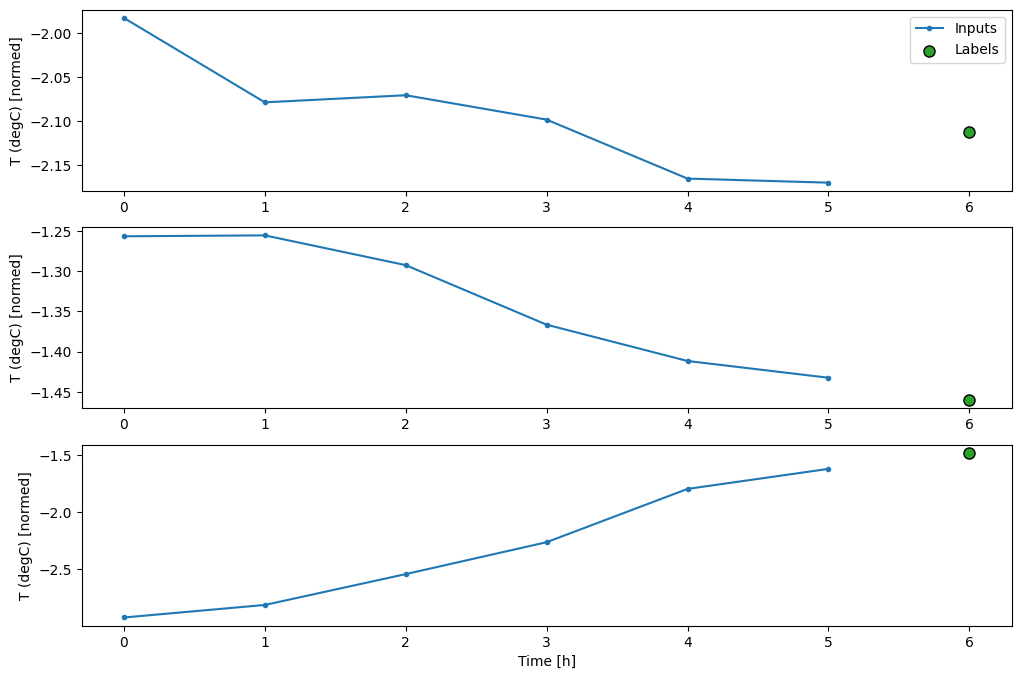

In [84]:
w2.example = example_inputs, example_labels
w2.plot()

### 데이터셋 만들기

여기부터 허깅페이스에 등록할 데이터셋을 만든다

In [ ]:
import pandas as pd
from huggingface_hub import HfApi
from datasets import Dataset, DatasetDict, DatasetInfo, Features, Value


# Hugging Face 사용자 ID 및 토큰 설정
username = "asanobm"  # Hugging Face 사용자 이름으로 교체

# HfApi 초기화
api = HfApi()

# 리포지토리 정보 설정
repo_name = "jena_climate_2009_2016"  # 리포지토리 이름
description = "This dataset contains train, eval, and test splits."  # 데이터셋 설명

info = DatasetInfo(
    description=description,
    citation="Some citation",
    homepage="https://www.bgc-jena.mpg.de/wetter/",
    features=Features({
        "Date Time": Value(dtype="timestamp[s]"),
        "T (degC)": Value(dtype="float32"),
        "p (mbar)": Value(dtype="float32"),
        "rho (g/m**3)": Value(dtype="float32"),
        "Wx": Value(dtype="float32"),
        "Wy": Value(dtype="float32"),
        "max Wx": Value(dtype="float32"),
        "max Wy": Value(dtype="float32"),
        "Day sin": Value(dtype="float32"),
        "Day cos": Value(dtype="float32"),
        "Year sin": Value(dtype="float32"),
        "Year cos": Value(dtype="float32"),
    }),
)

# 리포지토리 생성
# api.create_repo(
#     repo_id=f"{username}/{repo_name}",
#     repo_type="dataset",
#     private=True,  # 공개 리포지토리, 필요시 True로 변경
# )

dataset = DatasetDict({
    "train": Dataset.from_pandas(train_df),
    "validation": Dataset.from_pandas(val_df),
    "test": Dataset.from_pandas(test_df),
})

# 데이터셋 업로드
dataset.push_to_hub(
    repo_id=f"{username}/{repo_name}",
    commit_message="Initial commit",
    private=True,  # 공개 데이터셋, 필요시 False로 변경
)


TypeError: DatasetDict.push_to_hub() got an unexpected keyword argument 'dataset_info'